<a href="https://colab.research.google.com/github/theSC0RP/PyTorch-Deep-Learning/blob/master/ANN_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import torch
from torchvision import datasets, transforms

In [0]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [20]:
trainset.data.shape

torch.Size([60000, 28, 28])

In [0]:
image, label = next(iter(trainloader))

In [6]:
image.shape

torch.Size([64, 1, 28, 28])

In [0]:
im2 = image[0][0]

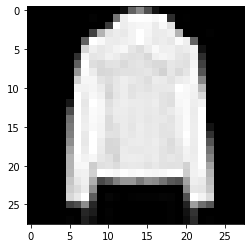

In [8]:
import matplotlib.pyplot as plt
plt.imshow(im2, 'gray')

In [9]:
label[0]

tensor(4)

In [0]:
from torch import nn

class ANN(nn.Module):
  def __init__(self):
    super(ANN, self).__init__()

    self.hidden1 = nn.Linear(784, 64)
    self.hidden2 = nn.Linear(64, 32)
    self.output = nn.Linear(32, 10)
    
    self.relu = nn.ReLU()
    self.log_softmax = nn.LogSoftmax(dim = 1)

  def forward(self, x):
    x = self.hidden1(x)
    x = self.relu(x)
    x = self.hidden2(x)
    x = self.relu(x)
    x = self.output(x)
    x = self.log_softmax(x)

    return x

In [0]:
model = ANN()

In [0]:
learning_rate = 0.003
num_epochs = 20

criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [47]:
for e in range(num_epochs):
  correct = 0
  running_loss = 0
  for i, (image, labels) in enumerate(trainloader):
    image = image.view(image.shape[0], -1)

    # Forward Pass
    outputs = model(image)
    loss = criterion(outputs, labels)
    (max_vals, arg_maxs) = torch.max(outputs.data, dim=1)
    correct += torch.sum(labels == arg_maxs)

    # Backward Pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print("{}/{} ----> loss = {:.3f}, accuracy = {:.2f}%".format(e+1, num_epochs, running_loss/len(trainloader), correct/600.0))



1/20 ----> loss = 0.383, accuracy = 86.45%
2/20 ----> loss = 0.380, accuracy = 86.60%
3/20 ----> loss = 0.377, accuracy = 86.57%
4/20 ----> loss = 0.374, accuracy = 86.76%
5/20 ----> loss = 0.372, accuracy = 86.86%
6/20 ----> loss = 0.369, accuracy = 86.92%
7/20 ----> loss = 0.367, accuracy = 87.07%
8/20 ----> loss = 0.364, accuracy = 87.09%
9/20 ----> loss = 0.362, accuracy = 87.18%
10/20 ----> loss = 0.360, accuracy = 87.33%
11/20 ----> loss = 0.358, accuracy = 87.35%
12/20 ----> loss = 0.355, accuracy = 87.34%
13/20 ----> loss = 0.353, accuracy = 87.46%
14/20 ----> loss = 0.351, accuracy = 87.54%
15/20 ----> loss = 0.349, accuracy = 87.69%
16/20 ----> loss = 0.347, accuracy = 87.71%
17/20 ----> loss = 0.345, accuracy = 87.77%
18/20 ----> loss = 0.343, accuracy = 87.87%
19/20 ----> loss = 0.341, accuracy = 87.90%
20/20 ----> loss = 0.340, accuracy = 87.96%
